In [ ]:
from google.colab import drive
drive.mount('/content/drive')
print("Change successful.")

In [ ]:
import os
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xg
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score


In [ ]:
pip install catboost

In [ ]:
#
data =pd.read_csv('/content/drive/MyDrive/be/rospl/brain_stroke.csv')
data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [ ]:
#
data.isna().sum()
#There are no null values

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
data.duplicated().sum()
#There are no duplicated rows

0

In [ ]:
#
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
#
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [ ]:
#eda#
'''Credits for the function: https://www.kaggle.com/greegtitan'''
def create_comparison_graph(feature: str, bins=2, ticks=True):
    fig, ax = plt.subplots(1, 2, figsize=(7,4), sharey=True, constrained_layout=True)

    fig.suptitle('Stroke patient based on {}'.format(feature), fontsize=16)

    sns.histplot(data[data['stroke'] == 0][feature], bins=bins, ax=ax[0])
    ax[0].set_ylabel('Count')
    ax[0].set_xlabel('No Stroke')
    if bins == 2:
        ax[0].set_xticks([0,1])
    if ticks: ax[0].set_xticklabels(['No', 'Yes'])

    sns.histplot(data[data['stroke'] == 1][feature], bins=bins, ax=ax[1])
    ax[1].set_xlabel('Stroke')
    if bins == 2:
        ax[1].set_xticks([0,1])
    if ticks: ax[1].set_xticklabels(['No', 'Yes'])

    fig.show()

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

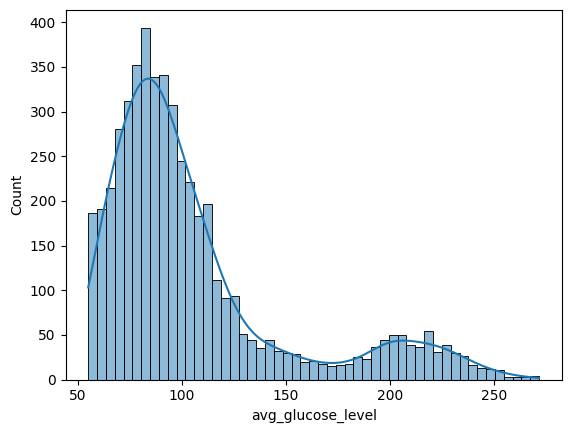

In [ ]:
#
sns.histplot(data=data,x="avg_glucose_level",kde=True)

<Axes: xlabel='age', ylabel='Count'>

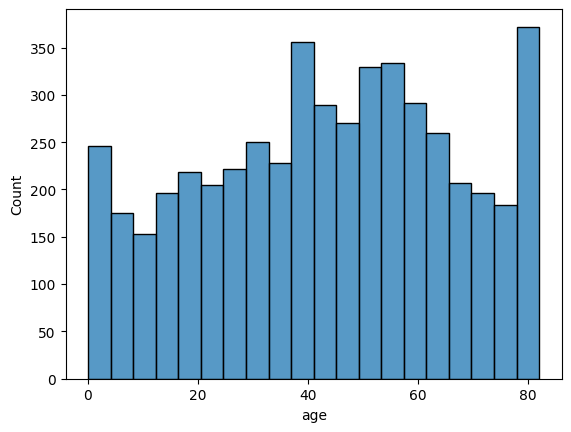

In [ ]:
#
sns.histplot(data=data,x="age")
#The data is most likely sampled from a large population

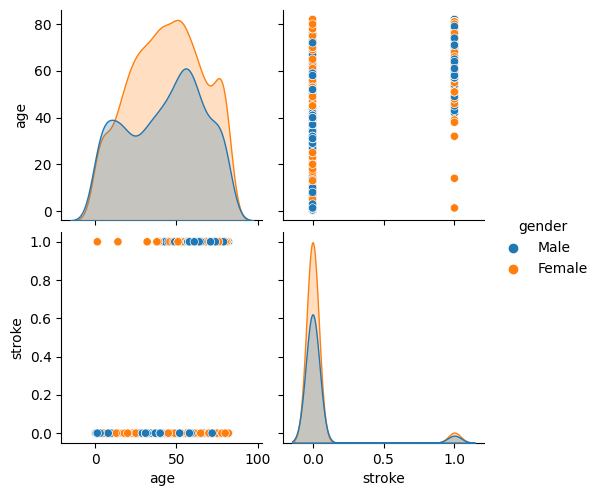

In [ ]:
#
columns=data[["age","gender","stroke"]]
sns.pairplot(columns, hue="gender")
plt.show()
#We can drop the age column

In [ ]:
data = data.drop(["age"],axis=1)
data.head(1)


,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1


<ipython-input-76-0e5e4731e101>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  if ticks: ax[0].set_xticklabels(['No', 'Yes'])
<ipython-input-76-0e5e4731e101>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  if ticks: ax[1].set_xticklabels(['No', 'Yes'])


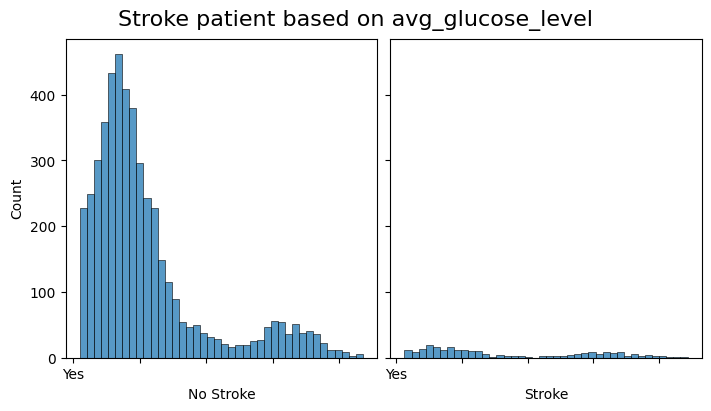

In [ ]:
#
#Relationship between stroke and avg_gluose_level - lower glucose level => lower chance of stroke
create_comparison_graph('avg_glucose_level',40)

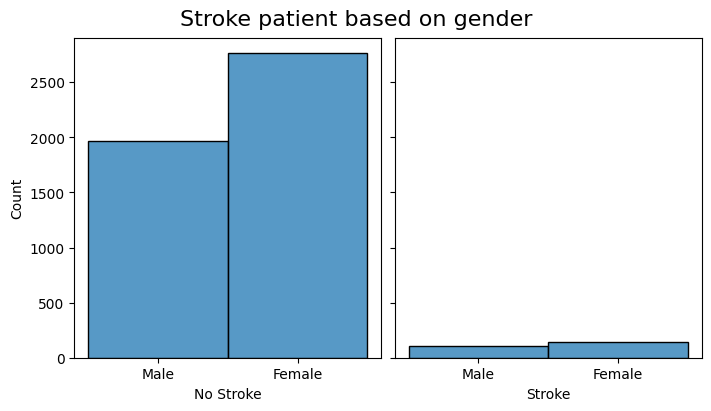

In [ ]:
#
#Relationship between stroke and gender - N/A
create_comparison_graph('gender',ticks=False)



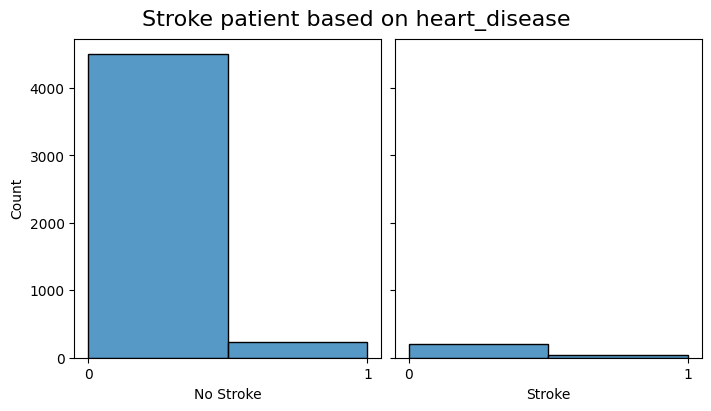

In [ ]:
#
#Relationship between stroke and heart_disease - no heart disease => lower chance of getting stroke
#The conclusion is not confounding  ref: https://www.cdc.gov/stroke/risk_factors.htm#:~:text=Heart%20disease,rich%20blood%20to%20the%20brain.
create_comparison_graph('heart_disease',ticks=False)

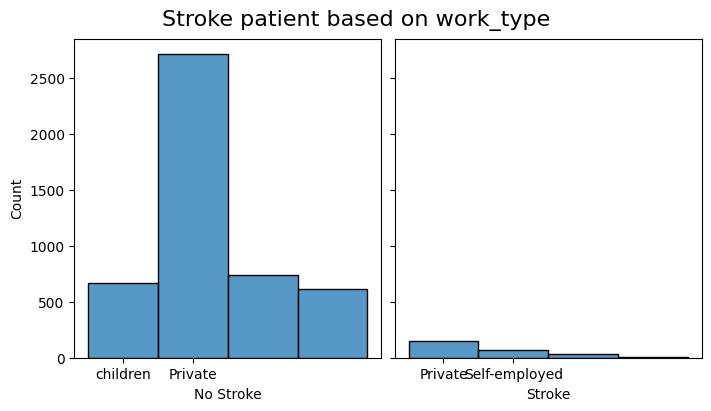

In [ ]:
#
#Relationship between stroke and work_type - confounding?
create_comparison_graph('work_type',ticks=False)



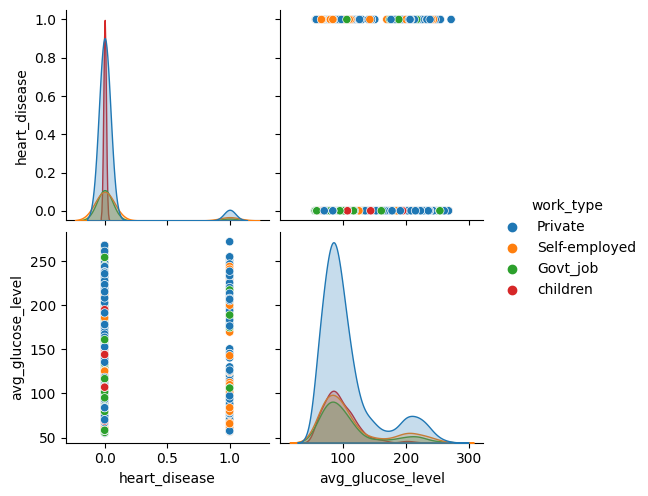

In [ ]:
#
columns = data[["heart_disease","avg_glucose_level","work_type"]]
sns.pairplot(columns,hue="work_type")
plt.show()
#work_type is confounding


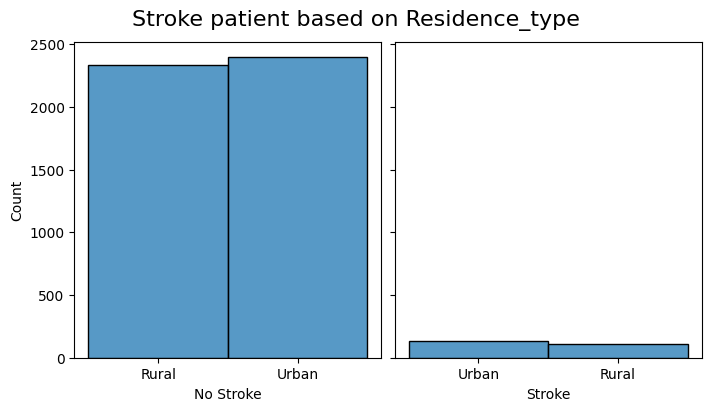

In [ ]:
#
#Relationship between stroke and residence - N/A
create_comparison_graph('Residence_type',ticks=False)

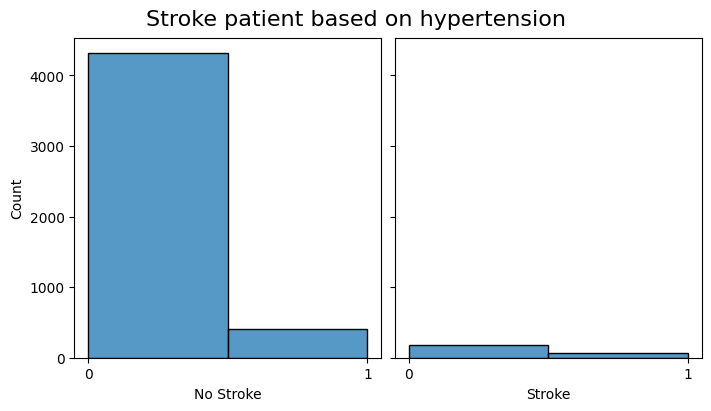

In [ ]:
#
#Relationship between stroke and hypertension - lower hypertension => lower chance of stroke
create_comparison_graph('hypertension',ticks=False)

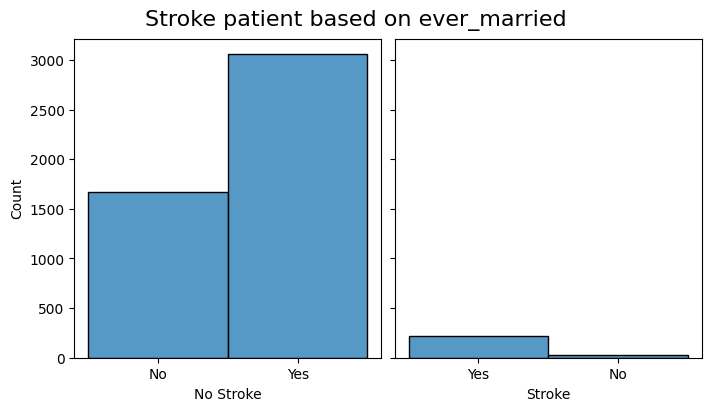

In [ ]:
#
#Relationship between stroke and married status - yes
create_comparison_graph('ever_married',ticks=False)

In [ ]:
#drop gender, residence, work_type columns
data = data.drop(["gender","Residence_type","work_type"],axis=1)
data.head(1)

,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke
0,0,1,Yes,228.69,36.6,formerly smoked,1


In [ ]:
#convert non-object types to categorical values
encoder = LabelEncoder()
data['ever_married'] = encoder.fit_transform(data['ever_married'])
ever_married = {index : label for index, label in enumerate(encoder.classes_)}
data['smoking_status'] = encoder.fit_transform(data['smoking_status'])
smoking_status = {index : label for index, label in enumerate(encoder.classes_)}


In [ ]:

x = data.drop('stroke',axis=1)
y = data['stroke']

In [ ]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(x)

In [ ]:
#train, test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [ ]:
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=6)

In [ ]:
DecisionTreeClassifier(max_depth=6)

DecisionTreeClassifier(max_depth=6)

In [ ]:
y_predict = dt.predict(x_test)

In [ ]:
#Algo
print("Decision Tree Accuracy:")
print(accuracy_score(y_test,y_predict))


Decision Tree Accuracy:
0.9438314944834504


In [ ]:

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_predict = rf.predict(x_test)

In [ ]:
#Algo
print("Random Forest Accuracy:")
print(accuracy_score(y_test,y_predict))

Random Forest Accuracy:
0.9448345035105316


In [ ]:
svc = SVC(kernel='rbf', gamma=1, C=2)
svc.fit(x_train, y_train)




SVC(C=2, gamma=1)

In [ ]:
y_predict = svc.predict(x_test)

In [ ]:
#Algo
print("SVC Accuracy:")
print(accuracy_score(y_test,y_predict))

SVC Accuracy:
0.9428284854563691


In [ ]:
#Algo
#xgb#

xgboost=xg.XGBClassifier(n_estimators=900,random_state=0, learning_rate=0.1)
result=cross_val_score(xgboost,x,y,cv=10,scoring='accuracy')
print('XGBoost Accuracy:',result.mean())

XGBoost Accuracy: 0.9405723092771888


In [ ]:
#Algo

# Load the Brain Stroke dataset
data =pd.read_csv('/content/drive/MyDrive/be/rospl/brain_stroke.csv')

# Preprocess the data
data.dropna(inplace=True)  # Remove rows with missing values

# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Split the data into features (X) and the target variable (y)
X = data.drop(columns=['stroke'])
y = data['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an AdaBoost classifier with a decision tree base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)  # You can adjust the base estimator's parameters
adaboost_classifier = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Non-Stroke', 'Stroke'])

# Display evaluation metrics
print(f'Accuracy: {accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.9468


In [ ]:
#Algo
data =pd.read_csv('/content/drive/MyDrive/be/rospl/brain_stroke.csv')
# Preprocess the data (you may need to handle missing values)
data.dropna(inplace=True)

# Encoding categorical variables (gender, ever_married, work_type, Residence_type, smoking_status)
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Split the data into features (X) and the target variable (y)
X = data.drop(columns=['stroke'])
y = data['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the CatBoost classifier
catboost_model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, loss_function='Logloss', cat_features=categorical_columns)

# Train the model
catboost_model.fit(X_train, y_train, verbose=100)

# Make predictions on the test set
y_pred = catboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Non-Stroke', 'Stroke'])

# Display evaluation metrics
print(f'Accuracy: {accuracy:.4f}')


0:	learn: 0.5464161	total: 13.7ms	remaining: 6.84s
100:	learn: 0.1153732	total: 714ms	remaining: 2.82s
200:	learn: 0.0791399	total: 1.34s	remaining: 1.99s
300:	learn: 0.0588278	total: 1.95s	remaining: 1.29s
400:	learn: 0.0450993	total: 2.56s	remaining: 632ms
499:	learn: 0.0364976	total: 3.21s	remaining: 0us
Accuracy: 0.9358


<Axes: >

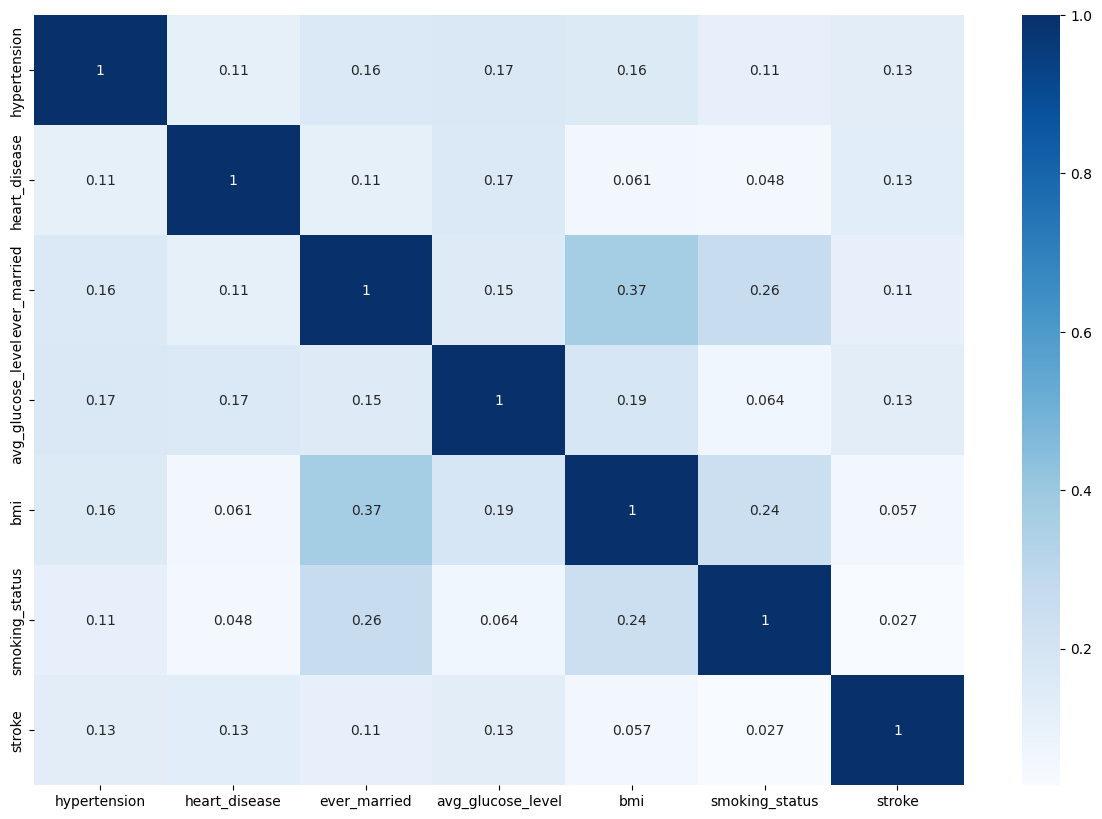

In [ ]:
#MODEL EVALUATION
#Display the correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap="Blues")

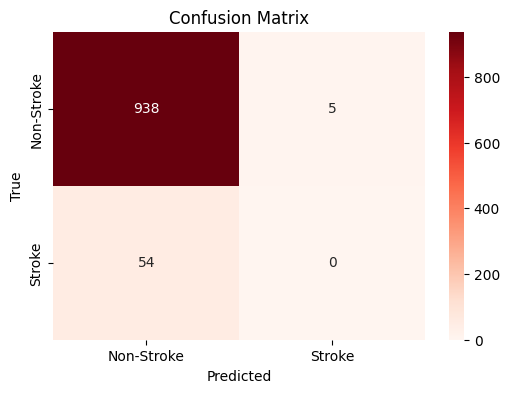

In [ ]:
#MODEL EVALUATION
data =pd.read_csv('/content/drive/MyDrive/be/rospl/brain_stroke.csv')
# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Split the data into features (X) and the target variable (y)
X = data.drop(columns=['stroke'])
y = data['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a machine learning model (Random Forest classifier in this example)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Non-Stroke', 'Stroke'], yticklabels=['Non-Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#MODEL EVALUATION
data =pd.read_csv('/content/drive/MyDrive/be/rospl/brain_stroke.csv')
# Preprocess the data
data.dropna(inplace=True)  # Remove rows with missing values

# Encode categorical variables using Label Encoding
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['ever_married'] = le.fit_transform(data['ever_married'])
data['work_type'] = le.fit_transform(data['work_type'])
data['Residence_type'] = le.fit_transform(data['Residence_type'])
data['smoking_status'] = le.fit_transform(data['smoking_status'])

# Split the data into features (X) and the target variable (y)
X = data.drop(columns=['stroke'])
y = data['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a machine learning model (Random Forest classifier in this example)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred, target_names=['Non-Stroke', 'Stroke'])
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

  Non-Stroke       0.95      0.99      0.97       943
      Stroke       0.00      0.00      0.00        54

    accuracy                           0.94       997
   macro avg       0.47      0.50      0.48       997
weighted avg       0.89      0.94      0.92       997

